<a href="https://colab.research.google.com/github/Borwec/mmsp_25_26/blob/main/lab1/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import random as rnd

# Фігури Лісажу
Змінити різницю фаз можливо за допомогою повзунка $ϕ$. Фігура при цьому зазнає викривлень

Змінити співвідношення $ω_1$ та $ω_2$ можна за допомогою повзунка $k$. При значеннях $k$, відмінних від цілих, кінці фігури мають розрив

In [2]:
omega = 1.0

t = np.linspace(0, 2 * np.pi, 1000)

def plot_figures(phi, k):
    x = np.sin(k * omega * t + phi)
    y = np.sin(omega * t)

    plt.figure(figsize=(8, 8))
    plt.plot(x, y)
    plt.axis("equal")
    plt.grid(True)
    plt.show()

phi_slider = widgets.FloatSlider(
    value=np.pi / 2,
    min=0.0,
    max=2 * np.pi,
    step=np.pi / 20,
    description="phi"
)

k_slider = widgets.FloatSlider(
    value=1.0,
    min=0.0,
    max=3.0,
    step=0.1,
    description="k"
)

widgets.interact(plot_figures, phi=phi_slider, k=k_slider)

interactive(children=(FloatSlider(value=1.5707963267948966, description='phi', max=6.283185307179586, step=0.1…

<function __main__.plot_figures(phi, k)>

# Поліном Чебишева
Порядок поліному визначається повзунком $n$

In [3]:
x = np.linspace(-1, 1, 1000)

def plot_poly(n):
    Tn = np.cos(n * np.arccos(x))

    plt.figure(figsize=(10, 5))
    plt.plot(x, Tn, linewidth=2)
    plt.grid(True)
    plt.show()

n_slider = widgets.IntSlider(
    value=5,
    min=3,
    max=7,
    step=1,
    description='n',
    continuous_update=True
)

widgets.interact(plot_poly, n=n_slider)

interactive(children=(IntSlider(value=5, description='n', max=7, min=3), Output()), _dom_classes=('widget-inte…

<function __main__.plot_poly(n)>

# Годограф Михайлова
У варіанті 7 характеристичний поліном системи має вигляд $D(p) = 3p^6 + p^4 + 2p^3 + 2$

Як можна спостерігати з графіку, ця система не є стійкою, оскільки годограф Михайлова відразу починає рухатися за годинниковою стрілкою

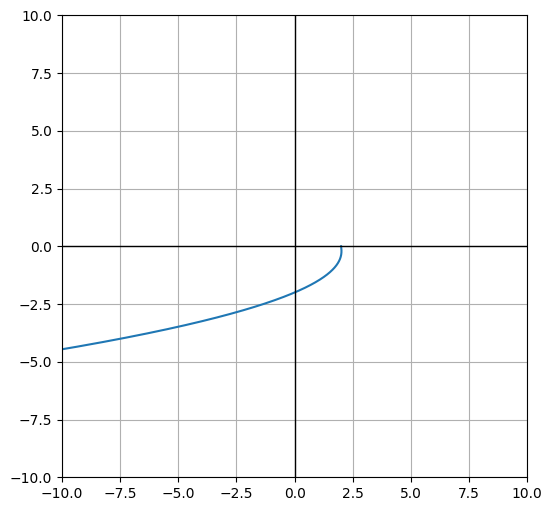

In [4]:
omega = np.linspace(0, 2, 1000)

Re = -3 * omega ** 6 + omega ** 4 + 2
Im = -2 * omega ** 3

plt.figure(figsize=(6, 6))
plt.plot(Re, Im)
plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)

plt.grid(True)
plt.axis((-10, 10, -10, 10))
plt.show()

# Банкомат

Банкомат підтримує картки, номер яких складається з 16 цифр та починається на 1337 або 1109. Код картки складаєьтся з 4 цифр. В даному випадку вважатимемо, що довільний коректний код є правильним для картки. Банкомат запускається функцією state0

In [5]:
def state0():
  print("Введіть номер картки")
  card_id = input("Номер: ")
  state1(card_id)
  return

In [6]:
def state1(card_id):
  allowed_cards = ["1337", "1109"]
  if len(card_id) != 16 or not card_id.isnumeric() or card_id[:4] not in allowed_cards:
    state13()
    return
  state2()
  return

In [7]:
def state2():
  print("Введіть код картки")
  card_pin = input("Код: ")
  state3(card_pin)
  return

In [8]:
def state3(card_pin, before_11 = True):
  if len(card_pin) != 4 or not card_pin.isnumeric():
    if before_11:
      state11(card_pin)
      return
    state12()
    return
  state4(card_pin)
  return

In [9]:
def state4(card_pin):
  rnd.seed(card_pin)
  balance_hrn = rnd.randint(10000, 100000)
  balance_kop = rnd.randint(1, 99)
  balance = float(str(balance_hrn) + "." + str(balance_kop))

  menu = """
  Виберіть дію

  1. Перевірити стан рахунку
  2. Зняти кошти
  3. Вихід
  """

  act = ""
  while 1:
    print(menu)
    act = input("Введіть номер дії: ")
    if act == "1":
      state5(balance)
      continue
    if act == "2":
      balance = state6(balance)
      continue
    if act == "3":
      state10()
      return
    input("Неправильно вибрана дія. Натиніть будь-яку кнопку для продовження")
    continue

In [10]:
def state5(balance):
  print(f"На вашому рахунку {balance} гривень")
  input("Натисніть будь-яку кнопку для повернення до меню")
  return

In [11]:
def state6(balance):
  while 1:
    take = input("Введіть суму для зйому: ")
    try:
      take_num = float(take)
      break
    except ValueError:
      print("Некоректно введена сума. Спробуйте ще раз")
  return state7(balance, take_num)

In [12]:
def state7(balance, take):
  if balance - take < 0:
    state9()
    return balance
  state8(balance, take)
  return balance - take

In [13]:
def state8(balance, take):
  print(f"Видано {take} гривень")
  print(f"Поточний стан рахунку: {balance - take}")
  return

In [14]:
def state9():
  print("Недостатньо коштів на рахунку")
  return

In [15]:
def state10():
  print("Дякуємо за користування банкоматом. На все добре!")
  return 1

In [16]:
def state11(card_pin):
  print("Введено невірний код. Повторіть спробу")
  card_pin = input("Введіть код картки: ")
  state3(card_pin, False)
  return

In [17]:
def state12():
  print("Введено невірний код. Картка заблокована")
  return 1

In [18]:
def state13():
  print("Запропонований тип картки не підтримується даним банком")
  return 1

In [19]:
state0()

Введіть номер картки
Номер: 1109123456321789
Введіть код картки
Код: 1337

  Виберіть дію

  1. Перевірити стан рахунку
  2. Зняти кошти
  3. Вихід
  
Введіть номер дії: 1
На вашому рахунку 69619.4 гривень
Натисніть будь-яку кнопку для повернення до меню

  Виберіть дію

  1. Перевірити стан рахунку
  2. Зняти кошти
  3. Вихід
  
Введіть номер дії: 2
Введіть суму для зйому: 80000
Недостатньо коштів на рахунку

  Виберіть дію

  1. Перевірити стан рахунку
  2. Зняти кошти
  3. Вихід
  
Введіть номер дії: 2
Введіть суму для зйому: 12000.6
Видано 12000.6 гривень
Поточний стан рахунку: 57618.799999999996

  Виберіть дію

  1. Перевірити стан рахунку
  2. Зняти кошти
  3. Вихід
  
Введіть номер дії: 3
Дякуємо за користування банкоматом. На все добре!
